In [1]:
import os
import json
import matplotlib.pyplot as plt


In [2]:

# Base directory containing all results
n1_dir = f'1n_gateway_results_1000bs'
n2_dir = f'2n_gateway_results_1000bs'
n4_dir = f'4n_gateway_results_1000bs'
n8_dir = f'8n_gateway_results_1000bs'
n10_dir = f'10n_gateway_results_1000bs'
n16_dir = f'16n_gateway_results_1000bs'

In [3]:
# Helper to convert bytes into readable KB/MB/GB
def format_bytes(num_bytes):
    if num_bytes >= 1024 ** 3:
        return f"{num_bytes / (1024 ** 3):.1f} GB"
    elif num_bytes >= 1024 ** 2:
        return f"{num_bytes / (1024 ** 2):.1f} MB"
    elif num_bytes >= 1024:
        return f"{num_bytes / 1024:.1f} KB"
    else:
        return f"{num_bytes} B"

# Helper function to plot BW and IOPS with color per xfersize
def plot_with_xfersize(ax_bw, ax_iops, data, title, color_map):
    if not data:
        return

    unique_xfersizes = sorted(set(xfersize for _, _, xfersize, _ in data))
    colors = plt.cm.tab10.colors
    xfersize_to_color = {xf: colors[i % len(colors)] for i, xf in enumerate(unique_xfersizes)}

    for xf in unique_xfersizes:
        xs = [t for t, _, x, _ in data if x == xf]
        ys_bw = [b for _, b, x, _ in data if x == xf]
        ys_iops = [i for _, _, x, i in data if x == xf]
        label = f'xfersize {format_bytes(xf)}'

        ax_bw.scatter(xs, ys_bw, label=label, color=xfersize_to_color[xf])
        ax_iops.scatter(xs, ys_iops, label=label, color=xfersize_to_color[xf])

    ax_bw.set_title(title + " [BW]")
    ax_bw.set_xlabel('Tasks Per Node')
    ax_bw.set_ylabel('Mean BW (MiB/s)')
    ax_bw.grid(True)

    ax_iops.set_title(title + " [IOPS]")
    ax_iops.set_xlabel('Tasks Per Node')
    ax_iops.set_ylabel('Mean IOPS')
    ax_iops.grid(True)

    ax_bw.legend()

def plot_ior_perf(base_dir, plot_title='1 Node Write BW and IOPS vs TasksPerNode'):
    write_data = []  # list of (tasks_per_node, bw_mean, xfersize, iops)
    read_data = []

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                with open(json_path, 'r') as f:
                    try:
                        data = json.load(f)
                        if 'summary' in data:
                            for entry in data['summary']:
                                op = entry.get('operation')
                                tasks_per_node = entry.get('tasksPerNode')
                                bw_mean = entry.get('bwMeanMIB')
                                xfersize = entry.get('transferSize')
                                iops = entry.get('OPsMean')

                                if op == 'write':
                                    write_data.append((tasks_per_node, bw_mean, xfersize, iops))
                                elif op == 'read':
                                    read_data.append((tasks_per_node, bw_mean, xfersize, iops))
                    except Exception as e:
                        print(f"Error loading file: {file}: {e}")

    plt.figure(figsize=(10, 6))

    # Write plots
    ax1 = plt.subplot(2, 2, 1)
    ax2 = plt.subplot(2, 2, 2)
    plot_with_xfersize(ax1, ax2, write_data, plot_title + " [Write]", plt.cm.Blues)

    # Read plots
    ax3 = plt.subplot(2, 2, 3)
    ax4 = plt.subplot(2, 2, 4)
    plot_with_xfersize(ax3, ax4, read_data, plot_title + " [Read]", plt.cm.Greens)

    plt.tight_layout()
    figure_name = plot_title.replace(' ', '_') + ".pdf"
    plt.savefig(figure_name)
    plt.show()

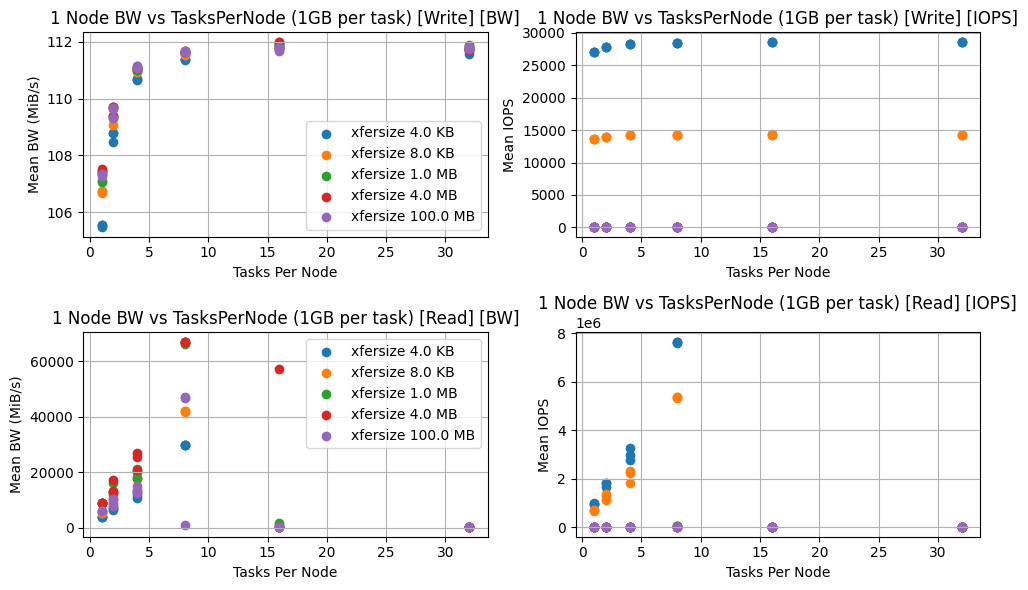

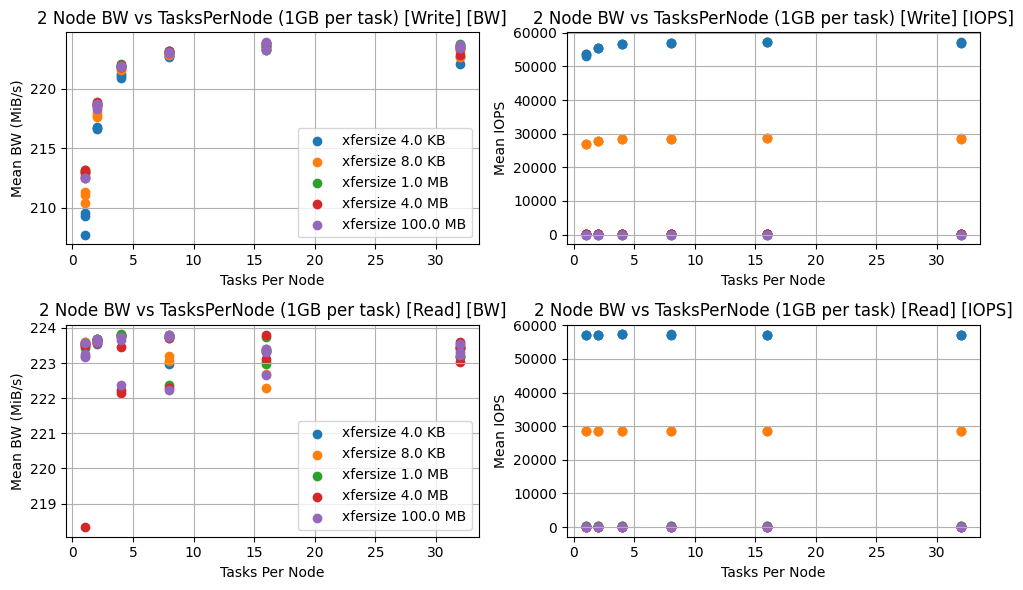

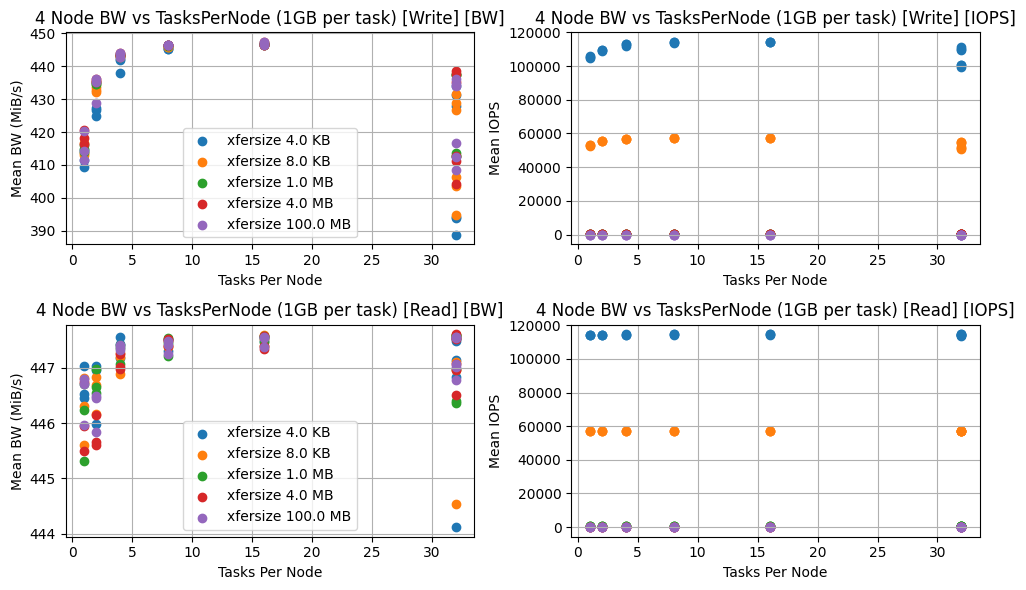

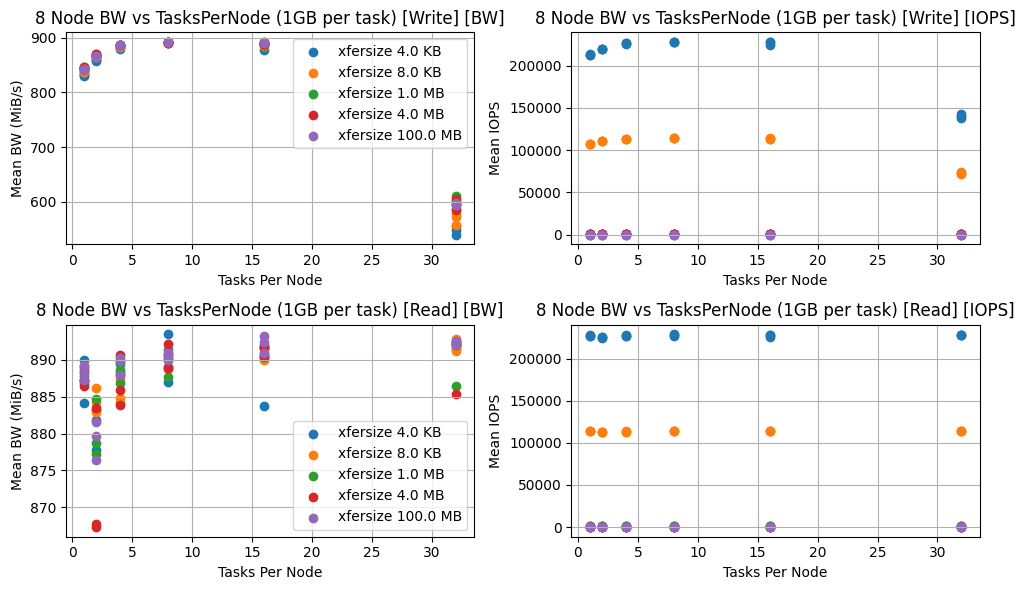

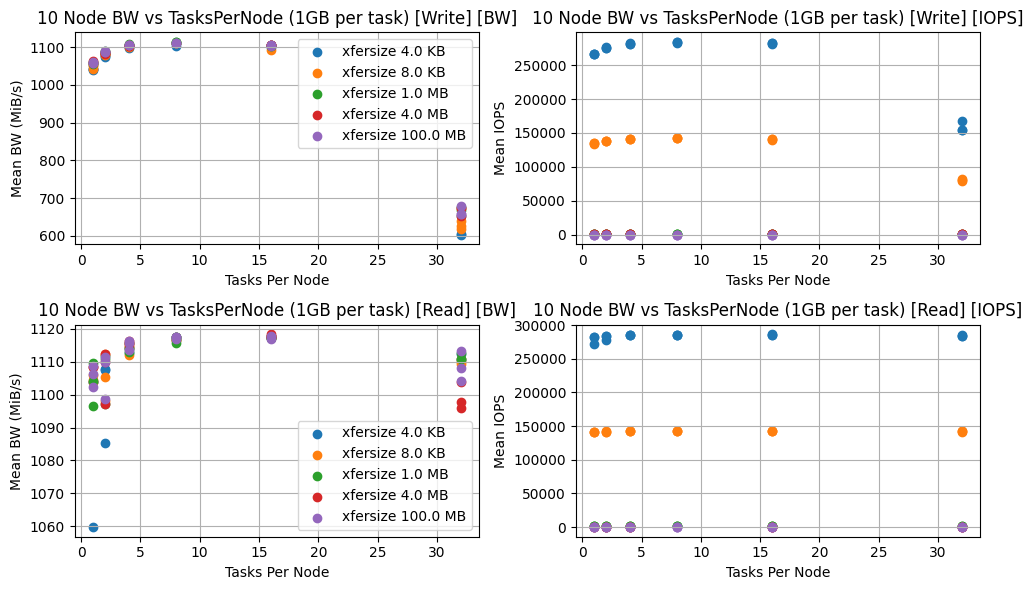

Error loading file: 32_ts4k_bs1000m_t2.json: Expecting value: line 77 column 1 (char 2472)


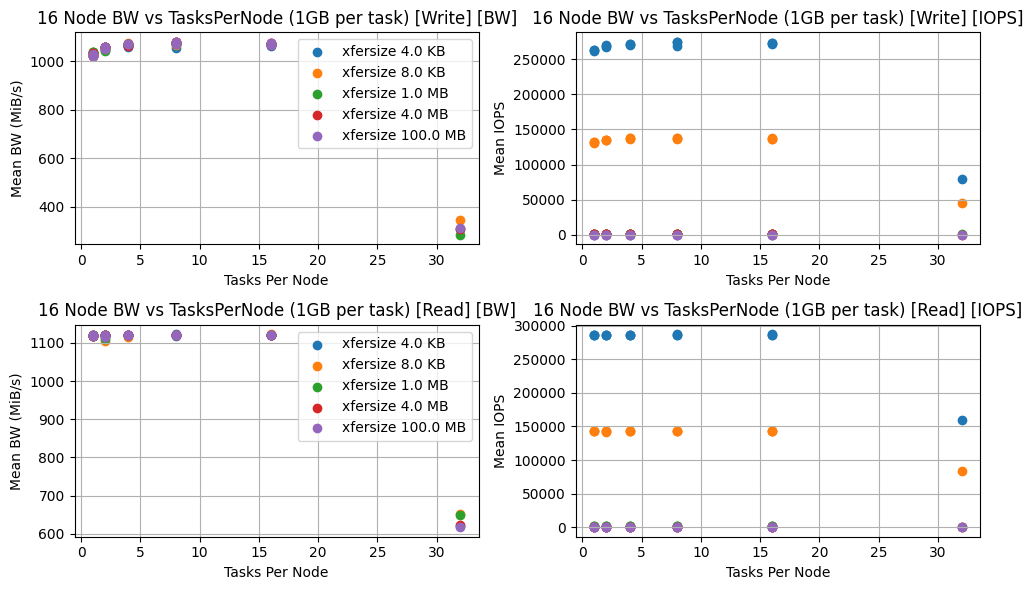

In [4]:
plot_ior_perf(n1_dir, '1 Node BW vs TasksPerNode (1GB per task)')
plot_ior_perf(n2_dir, '2 Node BW vs TasksPerNode (1GB per task)')
plot_ior_perf(n4_dir, '4 Node BW vs TasksPerNode (1GB per task)')
plot_ior_perf(n8_dir, '8 Node BW vs TasksPerNode (1GB per task)')

plot_ior_perf(n10_dir, '10 Node BW vs TasksPerNode (1GB per task)')
plot_ior_perf(n16_dir, '16 Node BW vs TasksPerNode (1GB per task)')


Error loading file: 32_ts4k_bs1000m_t2.json: Expecting value: line 77 column 1 (char 2472)


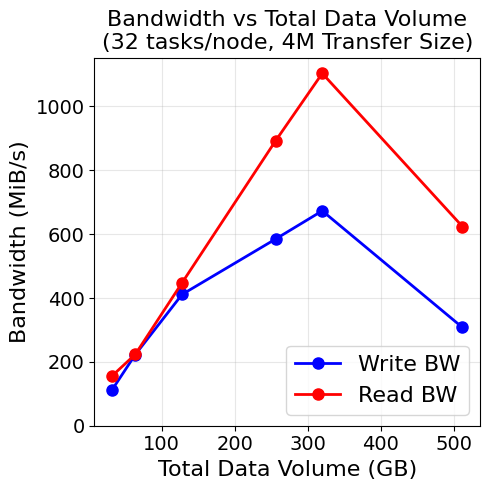

Data for 32 tasks per node, 4MB transfer size:
Data Volume (GB)   Write BW (MiB/s)   Read BW (MiB/s)   
------------------------------------------------------
32                 111.8              155.6             
64                 222.8              223.6             
128                411.2              447.5             
256                584.6              892.1             
320                673.1              1103.7            
512                307.7              623.9             


In [10]:
# import os
# import json
# import matplotlib.pyplot as plt

# # Directory mapping
# dirs_map = {
#     1: '1n_gateway_results_1000bs',
#     2: '2n_gateway_results_1000bs', 
#     4: '4n_gateway_results_1000bs',
#     8: '8n_gateway_results_1000bs',
#     10: '10n_gateway_results_1000bs',
#     16: '16n_gateway_results_1000bs'
# }

# # Target parameters
# target_tasks_per_node = 32
# target_xfersize = 4 * 1024 * 1024  # 4MB in bytes

# def extract_bandwidth_data(base_dir, target_tasks, target_xfer):
#     """Extract bandwidth data for specific tasks per node and transfer size"""
#     write_bw = None
#     read_bw = None
    
#     for root, dirs, files in os.walk(base_dir):
#         for file in files:
#             if file.endswith('.json'):
#                 json_path = os.path.join(root, file)
#                 with open(json_path, 'r') as f:
#                     try:
#                         data = json.load(f)
#                         if 'summary' in data:
#                             for entry in data['summary']:
#                                 op = entry.get('operation')
#                                 tasks_per_node = entry.get('tasksPerNode')
#                                 bw_mean = entry.get('bwMeanMIB')
#                                 xfersize = entry.get('transferSize')
                                
#                                 if (tasks_per_node == target_tasks and 
#                                     xfersize == target_xfer):
#                                     if op == 'write':
#                                         write_bw = bw_mean
#                                     elif op == 'read':
#                                         read_bw = bw_mean
#                     except Exception as e:
#                         print(f"Error loading file: {file}: {e}")
    
#     return write_bw, read_bw

# # Collect data for all node counts
# nodes = []
# write_bandwidths = []
# read_bandwidths = []

# for node_count, directory in dirs_map.items():
#     if os.path.exists(directory):
#         write_bw, read_bw = extract_bandwidth_data(directory, target_tasks_per_node, target_xfersize)
#         if write_bw is not None or read_bw is not None:
#             nodes.append(node_count)
#             write_bandwidths.append(write_bw if write_bw is not None else 0)
#             read_bandwidths.append(read_bw if read_bw is not None else 0)
#     else:
#         print(f"Directory {directory} not found")

# # Create the plot
# plt.figure(figsize=(5, 5))
# plt.plot(nodes, write_bandwidths, 'bo-', label='Write BW', linewidth=2, markersize=8)
# plt.plot(nodes, read_bandwidths, 'ro-', label='Read BW', linewidth=2, markersize=8)

# plt.xlabel('Number of Nodes')
# plt.ylabel('Bandwidth (MiB/s)')
# plt.title(f'Bandwidth vs Number of Nodes\n(Tasks per Node: {target_tasks_per_node}, Transfer Size: 4MB)', fontsize=16)
# plt.grid(True, alpha=0.3)
# plt.legend(fontsize=16)

# plt.xticks(nodes)  # Show only the actual node counts on x-axis
# # # modify x axis into log scale
# # plt.xscale('log')

# # Optional: Set y-axis to start from 0 for better comparison
# plt.ylim(bottom=0)

# plt.tight_layout()
# plt.savefig('ior_data_volumn.pdf')
# plt.show()

# # Print the data for verification
# print(f"Data for {target_tasks_per_node} tasks per node, 4MB transfer size:")
# for i, node_count in enumerate(nodes):
#     print(f"Nodes: {node_count}, Write BW: {write_bandwidths[i]:.1f} MiB/s, Read BW: {read_bandwidths[i]:.1f} MiB/s")
    
    
import os
import json
import matplotlib.pyplot as plt

# Directory mapping
dirs_map = {
    1: '1n_gateway_results_1000bs',
    2: '2n_gateway_results_1000bs', 
    4: '4n_gateway_results_1000bs',
    8: '8n_gateway_results_1000bs',
    10: '10n_gateway_results_1000bs',
    16: '16n_gateway_results_1000bs'
}

# Target parameters
target_tasks_per_node = 32
target_xfersize = 4 * 1024 * 1024  # 4MB in bytes
block_size_gb = 1.0  # 1000bs = 1000MB = 1GB per task

def extract_bandwidth_data(base_dir, target_tasks, target_xfer):
    """Extract bandwidth data for specific tasks per node and transfer size"""
    write_bw = None
    read_bw = None
    
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                with open(json_path, 'r') as f:
                    try:
                        data = json.load(f)
                        if 'summary' in data:
                            for entry in data['summary']:
                                op = entry.get('operation')
                                tasks_per_node = entry.get('tasksPerNode')
                                bw_mean = entry.get('bwMeanMIB')
                                xfersize = entry.get('transferSize')
                                
                                if (tasks_per_node == target_tasks and 
                                    xfersize == target_xfer):
                                    if op == 'write':
                                        write_bw = bw_mean
                                    elif op == 'read':
                                        read_bw = bw_mean
                    except Exception as e:
                        print(f"Error loading file: {file}: {e}")
    
    return write_bw, read_bw

# Collect data for all node counts
data_volumes = []
write_bandwidths = []
read_bandwidths = []

for node_count, directory in dirs_map.items():
    if os.path.exists(directory):
        write_bw, read_bw = extract_bandwidth_data(directory, target_tasks_per_node, target_xfersize)
        if write_bw is not None or read_bw is not None:
            # Calculate total data volume: nodes × tasks_per_node × block_size_gb
            total_data_volume_gb = node_count * target_tasks_per_node * block_size_gb
            
            data_volumes.append(total_data_volume_gb)
            write_bandwidths.append(write_bw if write_bw is not None else 0)
            read_bandwidths.append(read_bw if read_bw is not None else 0)
    else:
        print(f"Directory {directory} not found")

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(data_volumes, write_bandwidths, 'bo-', label='Write BW', linewidth=2, markersize=8)
plt.plot(data_volumes, read_bandwidths, 'ro-', label='Read BW', linewidth=2, markersize=8)

plt.xlabel('Total Data Volume (GB)', fontsize=16)
plt.ylabel('Bandwidth (MiB/s)', fontsize=16)
plt.title(f'Bandwidth vs Total Data Volume\n({target_tasks_per_node} tasks/node, 4M Transfer Size)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Optional: Set y-axis to start from 0 for better comparison
plt.ylim(bottom=0)

plt.tight_layout()
plt.savefig('ior_data_volume.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print the data for verification
print(f"Data for {target_tasks_per_node} tasks per node, 4MB transfer size:")
print(f"{'Data Volume (GB)':<18} {'Write BW (MiB/s)':<18} {'Read BW (MiB/s)':<18}")
print("-" * 54)
for i, data_volume in enumerate(data_volumes):
    print(f"{data_volume:<18.0f} {write_bandwidths[i]:<18.1f} {read_bandwidths[i]:<18.1f}")

Loading and processing data for 32 tasks per node...
Found 14 files for 32 tasks per node
Processed: 10n_gateway_results_1000bs/result_ior_32_ts4m_bs1000m_t2/32_ts4m_bs1000m_t2.json -> transfer_size:4m, write:673.5452, read:1097.8657
Processed: 10n_gateway_results_1000bs/result_ior_32_ts4m_bs1000m_t3/32_ts4m_bs1000m_t3.json -> transfer_size:4m, write:653.4045, read:1095.9312
Processed: 10n_gateway_results_1000bs/result_ior_32_ts100m_bs1000m_t3/32_ts100m_bs1000m_t3.json -> transfer_size:100m, write:657.9459, read:1108.2078
Processed: 10n_gateway_results_1000bs/result_ior_32_ts4k_bs1000m_t2/32_ts4k_bs1000m_t2.json -> transfer_size:4k, write:603.2354, read:1112.367
Processed: 10n_gateway_results_1000bs/result_ior_32_ts4m_bs1000m_t1/32_ts4m_bs1000m_t1.json -> transfer_size:4m, write:673.0776, read:1103.6933
Processed: 10n_gateway_results_1000bs/result_ior_32_ts1m_bs1000m_t3/32_ts1m_bs1000m_t3.json -> transfer_size:1m, write:668.4086, read:1112.6169
Processed: 10n_gateway_results_1000bs/res

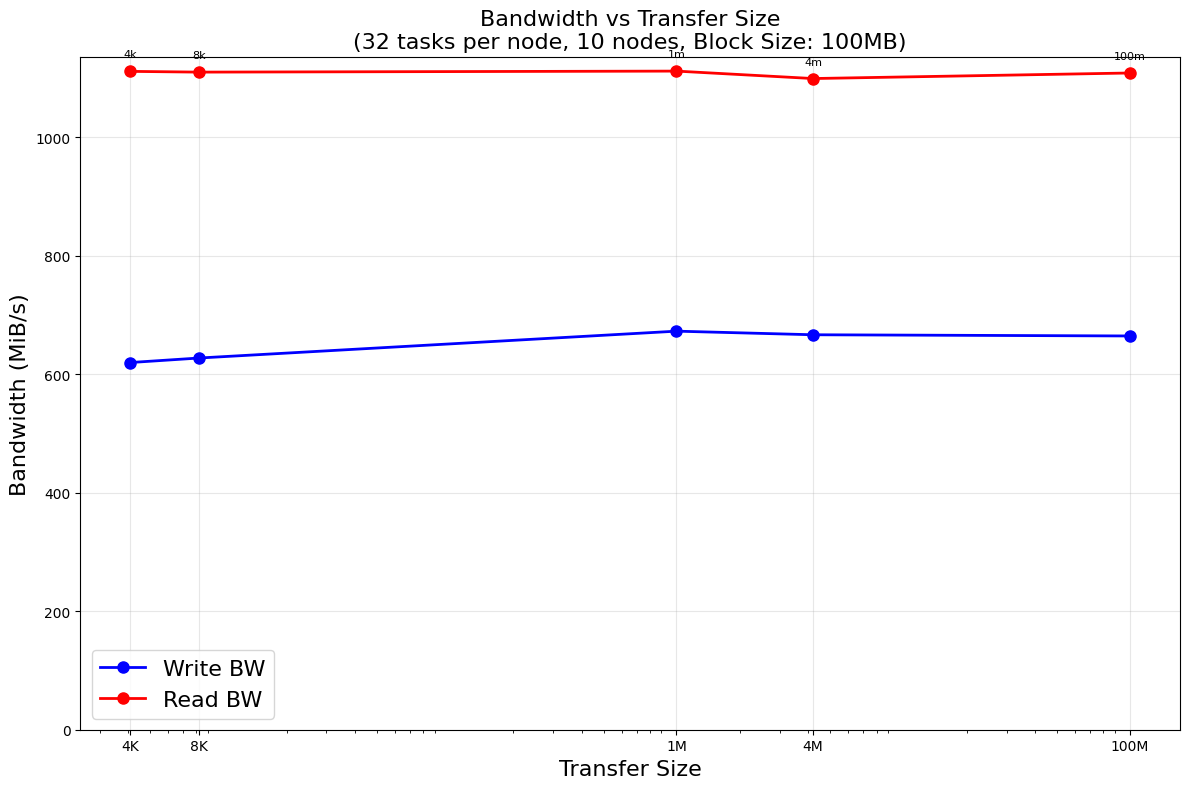


Summary of processed data:
Transfer Size Write BW (MiB/s) Read BW (MiB/s)
---------------------------------------------
4k           619.8           1111.3         
8k           627.4           1110.0         
1m           672.8           1111.7         
4m           666.7           1099.2         
100m         664.6           1108.5         

Transfer size range: 4K to 100M
Write BW range: 619.8 to 672.8 MiB/s
Read BW range: 1099.2 to 1111.7 MiB/s


In [6]:
import os
import json
import matplotlib.pyplot as plt
import re
from collections import defaultdict

# Constants
TASKS_PER_NODE = 32
NUM_NODES = 10

def parse_size(size_str):
    """Parse size string and return size in bytes"""
    # Extract number and unit from strings like '100m', '4k', '1m'
    match = re.match(r'(\d+)([kmgt]?)', size_str.lower())
    if not match:
        return 0
    
    number = int(match.group(1))
    unit = match.group(2)
    
    multipliers = {
        '': 1,
        'k': 1024,
        'm': 1024**2,
        'g': 1024**3,
        't': 1024**4
    }
    
    return number * multipliers.get(unit, 1)

def format_size(size_bytes):
    """Format size in bytes to human readable format"""
    if size_bytes >= 1024**2:
        return f"{size_bytes / (1024**2):.0f}M"
    elif size_bytes >= 1024:
        return f"{size_bytes / 1024:.0f}K"
    else:
        return f"{size_bytes}B"

def extract_transfer_size(filepath):
    """Extract transfer size from filepath"""
    # Extract from filename like '32_ts100m_bs100m_t1.json' 
    filename = os.path.basename(filepath)
    
    # Extract the transfer size after 'ts'
    match = re.search(r'_ts([0-9]+[kmgt]?)_', filename)
    if match:
        return match.group(1)
    
    return None

def extract_tasks_per_node(filepath):
    """Extract tasks per node from filepath"""
    # Extract from filename like '32_ts100m_bs100m_t1.json' 
    filename = os.path.basename(filepath)
    
    # Extract the number at the beginning of filename
    match = re.search(r'^(\d+)_ts', filename)
    if match:
        return int(match.group(1))
    
    return None

def load_and_process_data():
    """Load specific JSON files and process the data for 32 tasks per node"""
    data = defaultdict(list)  # data[transfer_size] = [(write_bw, read_bw), ...]
    
    # Search in the specific directory structure
    base_dir = '10n_gateway_results_1000bs'
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} not found in current path")
        return data
    
    # Find all JSON files for 32 tasks per node
    json_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.json') and file.startswith('32_ts') and '_bs1000m_' in file:
                json_files.append(os.path.join(root, file))
    
    print(f"Found {len(json_files)} files for 32 tasks per node")
    
    for json_file in json_files:
        tasks_per_node = extract_tasks_per_node(json_file)
        transfer_size = extract_transfer_size(json_file)
        
        if tasks_per_node != TASKS_PER_NODE:
            continue  # Skip if not 32 tasks per node
            
        if transfer_size is None:
            print(f"Could not extract transfer size from: {json_file}")
            continue
        
        try:
            with open(json_file, 'r') as f:
                json_data = json.load(f)
                
            if 'summary' not in json_data:
                print(f"No summary found in: {json_file}")
                continue
                
            write_bw = None
            read_bw = None
            
            for entry in json_data['summary']:
                if entry.get('operation') == 'write':
                    write_bw = entry.get('bwMeanMIB')
                elif entry.get('operation') == 'read':
                    read_bw = entry.get('bwMeanMIB')
            
            if write_bw is not None or read_bw is not None:
                data[transfer_size].append((write_bw, read_bw))
                print(f"Processed: {json_file} -> transfer_size:{transfer_size}, write:{write_bw}, read:{read_bw}")
                
        except Exception as e:
            print(f"Error processing {json_file}: {e}")
    
    return data

def average_data(data):
    """Average the bandwidth values for each transfer size configuration"""
    averaged_data = {}
    
    for transfer_size, bw_list in data.items():
        write_bws = [bw[0] for bw in bw_list if bw[0] is not None]
        read_bws = [bw[1] for bw in bw_list if bw[1] is not None]
        
        avg_write_bw = sum(write_bws) / len(write_bws) if write_bws else None
        avg_read_bw = sum(read_bws) / len(read_bws) if read_bws else None
        
        if avg_write_bw is not None or avg_read_bw is not None:
            averaged_data[transfer_size] = (avg_write_bw, avg_read_bw)
    
    return averaged_data

# Load and process all data
print(f"Loading and processing data for {TASKS_PER_NODE} tasks per node...")
all_data = load_and_process_data()

print(f"\nFound data for {len(all_data)} different transfer sizes:")
for ts in sorted(all_data.keys(), key=lambda x: parse_size(x)):
    print(f"  Transfer size: {ts}")

# Average the data across trials (t1, t2, t3)
averaged_data = average_data(all_data)

# Prepare data for plotting
plot_data = []
for transfer_size, (write_bw, read_bw) in averaged_data.items():
    transfer_size_bytes = parse_size(transfer_size)
    plot_data.append({
        'transfer_size': transfer_size,
        'transfer_size_bytes': transfer_size_bytes,
        'transfer_size_formatted': format_size(transfer_size_bytes),
        'write_bw': write_bw if write_bw is not None else 0,
        'read_bw': read_bw if read_bw is not None else 0
    })

# Sort by transfer size in bytes
plot_data.sort(key=lambda x: x['transfer_size_bytes'])

print(f"\nPlot data points: {len(plot_data)}")

if not plot_data:
    print("No data points found! Check file paths and data extraction.")
else:
    # Extract data for plotting
    transfer_sizes = [d['transfer_size_formatted'] for d in plot_data]
    transfer_size_bytes = [d['transfer_size_bytes'] for d in plot_data]
    write_bws = [d['write_bw'] for d in plot_data]
    read_bws = [d['read_bw'] for d in plot_data]

    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Use transfer size bytes for x-axis to enable log scale
    plt.plot(transfer_size_bytes, write_bws, 'bo-', label='Write BW', linewidth=2, markersize=8)
    plt.plot(transfer_size_bytes, read_bws, 'ro-', label='Read BW', linewidth=2, markersize=8)

    # Set log scale for x-axis since transfer sizes vary greatly
    plt.xscale('log')
    
    plt.xlabel('Transfer Size', fontsize=16)
    plt.ylabel('Bandwidth (MiB/s)', fontsize=16)
    plt.title(f'Bandwidth vs Transfer Size\n({TASKS_PER_NODE} tasks per node, {NUM_NODES} nodes, Block Size: 100MB)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=16)

    # Set custom x-axis labels
    plt.xticks(transfer_size_bytes, transfer_sizes)
    
    # Optional: Set y-axis to start from 0 for better comparison
    plt.ylim(bottom=0)

    # Add text annotations showing actual transfer sizes
    for d in plot_data:
        max_bw = max(d['write_bw'], d['read_bw'])
        plt.annotate(d['transfer_size'], 
                    xy=(d['transfer_size_bytes'], max_bw), 
                    xytext=(0, 10), textcoords='offset points', 
                    fontsize=8, ha='center')

    plt.tight_layout()
    plt.savefig(f'bandwidth_vs_transfer_size_{TASKS_PER_NODE}tpn.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    # Print summary
    print("\nSummary of processed data:")
    print(f"{'Transfer Size':<12} {'Write BW (MiB/s)':<15} {'Read BW (MiB/s)':<15}")
    print("-" * 45)
    for d in plot_data:
        print(f"{d['transfer_size']:<12} {d['write_bw']:<15.1f} {d['read_bw']:<15.1f}")
        
    # Additional analysis
    print(f"\nTransfer size range: {transfer_sizes[0]} to {transfer_sizes[-1]}")
    print(f"Write BW range: {min(write_bws):.1f} to {max(write_bws):.1f} MiB/s")
    print(f"Read BW range: {min(read_bws):.1f} to {max(read_bws):.1f} MiB/s")

In [7]:
import os
import json
import csv

def format_bytes(num_bytes):
    if num_bytes >= 1024 ** 3:
        return f"{num_bytes / (1024 ** 3):.1f} GB"
    elif num_bytes >= 1024 ** 2:
        return f"{num_bytes / (1024 ** 2):.1f} MB"
    elif num_bytes >= 1024:
        return f"{num_bytes / 1024:.1f} KB"
    else:
        return f"{num_bytes} B"

def find_best_BW_config_split(base_dir, output_prefix, output_csv=False):
    """
    Find the single best config separately for write and read,
    print details and save each to its own CSV.
    """
    best_write = None
    best_read = None

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                try:
                    with open(json_path, 'r') as f:
                        data = json.load(f)
                        if 'summary' in data:
                            for entry in data['summary']:
                                op = entry.get('operation')
                                tasks_per_node = entry.get('tasksPerNode')
                                bw_mean = entry.get('bwMeanMIB')
                                xfersize = entry.get('transferSize')
                                iops = entry.get('OPsMean')

                                if None in (op, tasks_per_node, bw_mean, xfersize, iops):
                                    continue

                                new_entry = {
                                    'operation': op,
                                    'tasksPerNode': tasks_per_node,
                                    'transferSize': xfersize,
                                    'bwMeanMIB': bw_mean,
                                    'iops': iops
                                }

                                if op == 'write':
                                    if best_write is None or bw_mean > best_write['bwMeanMIB']:
                                        best_write = new_entry
                                elif op == 'read':
                                    if best_read is None or bw_mean > best_read['bwMeanMIB']:
                                        best_read = new_entry
                except Exception as e:
                    print(f"Error loading file {file}: {e}")

    # Save & print best write config
    for best_entry, op in [(best_write, 'write'), (best_read, 'read')]:
        if best_entry:
            if output_csv:
                output_csv = f"{output_prefix}_best_{op}.csv"
                with open(output_csv, mode='w', newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(['Operation', 'TasksPerNode', 'TransferSize(Bytes)', 'TransferSize(Human)',
                                    'BestBW(MiB/s)', 'IOPS'])
                    writer.writerow([
                        best_entry['operation'],
                        best_entry['tasksPerNode'],
                        best_entry['transferSize'],
                        format_bytes(best_entry['transferSize']),
                        f"{best_entry['bwMeanMIB']:.2f}",
                        f"{best_entry['iops']:.2f}"
                    ])

            print(f"\nBest {op.upper()} config:")
            print(f"  Operation: {best_entry['operation']}")
            print(f"  TasksPerNode: {best_entry['tasksPerNode']}")
            print(f"  TransferSize: {best_entry['transferSize']} ({format_bytes(best_entry['transferSize'])})")
            print(f"  BestBW(MiB/s): {best_entry['bwMeanMIB']:.2f}")
            print(f"  BestIOPS: {best_entry['iops']:.2f}")
            print(f"  Saved to: {output_csv}")
        else:
            print(f"No valid {op} entries found.")

    print("-----------------------------")



In [8]:
base_root = './'

configs = {
    '1n': '1n_gateway_results_1000bs',
    '2n': '2n_gateway_results_1000bs',
    '4n': '4n_gateway_results_1000bs',
    '8n': '8n_gateway_results_1000bs',
    '10n': '10n_gateway_results_1000bs',
    '16n': '16n_gateway_results_1000bs',
}

for label, subdir in configs.items():
    input_dir = os.path.join(base_root, subdir)
    output_file = f'best_BW_1gb_pertask_{label}'
    find_best_BW_config_split(input_dir, output_file)


Best WRITE config:
  Operation: write
  TasksPerNode: 16
  TransferSize: 8192 (8.0 KB)
  BestBW(MiB/s): 112.01
  BestIOPS: 14337.44
  Saved to: False

Best READ config:
  Operation: read
  TasksPerNode: 8
  TransferSize: 4194304 (4.0 MB)
  BestBW(MiB/s): 67135.05
  BestIOPS: 16783.76
  Saved to: False
-----------------------------

Best WRITE config:
  Operation: write
  TasksPerNode: 16
  TransferSize: 104857600 (100.0 MB)
  BestBW(MiB/s): 223.94
  BestIOPS: 2.24
  Saved to: False

Best READ config:
  Operation: read
  TasksPerNode: 4
  TransferSize: 1048576 (1.0 MB)
  BestBW(MiB/s): 223.81
  BestIOPS: 223.81
  Saved to: False
-----------------------------

Best WRITE config:
  Operation: write
  TasksPerNode: 16
  TransferSize: 4194304 (4.0 MB)
  BestBW(MiB/s): 447.34
  BestIOPS: 111.83
  Saved to: False

Best READ config:
  Operation: read
  TasksPerNode: 32
  TransferSize: 4194304 (4.0 MB)
  BestBW(MiB/s): 447.61
  BestIOPS: 111.90
  Saved to: False
-----------------------------



In [9]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def parse_bandwidth_log(filepath):
    """Parse bandwidth from log file"""
    try:
        with open(filepath, 'r') as f:
            line = f.readline().strip()
            # Parse lines like "Download bandwidth: 25.00 MB/s (Total: 100.00 MB in 4s, Files: 1)"
            match = re.search(r'(Download|Upload|Copy) bandwidth: ([\d.]+) MB/s', line)
            if match:
                operation = match.group(1).lower()
                bandwidth = float(match.group(2))
                return operation, bandwidth
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
    return None, None

def extract_test_info(folder_path):
    """Extract node count and tasks per node from folder path"""
    # Extract from paths like '8n_gateway_cp_results_100bs/8n_result_cp_32_ts1m_bs100m_t1'
    parts = folder_path.split('/')
    if len(parts) >= 2:
        base_folder = parts[0]  # e.g., '8n_gateway_cp_results_100bs'
        result_folder = parts[1]  # e.g., '8n_result_cp_32_ts1m_bs100m_t1'
        
        # Extract number of nodes from base folder
        node_match = re.search(r'^(\d+)n_', base_folder)
        if not node_match:
            return None, None
        num_nodes = int(node_match.group(1))
        
        # Extract tasks per node from result folder
        task_match = re.search(r'_cp_(\d+)_ts', result_folder)
        if not task_match:
            return None, None
        tasks_per_node = int(task_match.group(1))
        
        return num_nodes, tasks_per_node
    
    return None, None

def load_cp_data():
    """Load all CP bandwidth data"""
    data = defaultdict(lambda: defaultdict(list))  # data[num_nodes][tasks_per_node] = [(upload_bw, download_bw), ...]
    
    # Find all directories with cp results
    cp_dirs = []
    for item in os.listdir('.'):
        if os.path.isdir(item) and '_cp_' in item:
            cp_dirs.append(item)
    
    print(f"Found {len(cp_dirs)} CP result directories")
    
    for cp_dir in cp_dirs:
        # Skip the r2 directories for now to avoid duplicates, or handle them separately
        if '_r2' in cp_dir:
            continue
            
        print(f"Processing directory: {cp_dir}")
        
        # Find all result subdirectories
        if not os.path.exists(cp_dir):
            continue
            
        for subdir in os.listdir(cp_dir):
            subdir_path = os.path.join(cp_dir, subdir)
            if not os.path.isdir(subdir_path):
                continue
                
            # Extract test info
            num_nodes, tasks_per_node = extract_test_info(f"{cp_dir}/{subdir}")
            if num_nodes is None or tasks_per_node is None:
                print(f"Could not extract info from: {cp_dir}/{subdir}")
                continue
            
            # Look for bandwidth log files
            upload_file = os.path.join(subdir_path, 'bandwidth.log')
            download_file = os.path.join(subdir_path, 'download_bandwidth.log')
            
            upload_bw = None
            download_bw = None
            
            if os.path.exists(upload_file):
                op, bw = parse_bandwidth_log(upload_file)
                if op == 'upload':
                    upload_bw = bw
            
            if os.path.exists(download_file):
                op, bw = parse_bandwidth_log(download_file)
                if op == 'download':
                    download_bw = bw
            
            if upload_bw is not None or download_bw is not None:
                data[num_nodes][tasks_per_node].append((upload_bw, download_bw))
                print(f"  {cp_dir}/{subdir} -> nodes:{num_nodes}, tasks:{tasks_per_node}, upload:{upload_bw}, download:{download_bw}")
    
    return data

def average_data(data):
    """Average the bandwidth values across trials"""
    averaged_data = defaultdict(dict)
    
    for num_nodes in data:
        for tasks_per_node in data[num_nodes]:
            trials = data[num_nodes][tasks_per_node]
            
            upload_bws = [trial[0] for trial in trials if trial[0] is not None]
            download_bws = [trial[1] for trial in trials if trial[1] is not None]
            
            avg_upload = sum(upload_bws) / len(upload_bws) if upload_bws else None
            avg_download = sum(download_bws) / len(download_bws) if download_bws else None
            
            if avg_upload is not None or avg_download is not None:
                averaged_data[num_nodes][tasks_per_node] = (avg_upload, avg_download)
    
    return averaged_data

# Load and process data
print("Loading CP bandwidth data...")
all_data = load_cp_data()

print(f"\nFound data for nodes: {sorted(all_data.keys())}")
for nodes in sorted(all_data.keys()):
    tasks_list = sorted(all_data[nodes].keys())
    print(f"  {nodes} nodes: tasks per node = {tasks_list}")

# Average the data
averaged_data = average_data(all_data)

# Plot 1: Fix to 32 tasks per node, vary number of nodes (show as total I/O size)
print("\n=== Plot 1: 32 tasks per node, varying total I/O size ===")
FIXED_TASKS_PER_NODE = 16
IO_SIZE_PER_TASK_MB = 1000  # bs100m = 100MB per task

def format_io_size(size_mb):
    """Format I/O size in MB to human readable format"""
    if size_mb >= 1024:
        return f"{size_mb / 1024:.1f} GB"
    else:
        return f"{size_mb:.0f} MB"

plot1_data = []
for num_nodes in sorted(averaged_data.keys()):
    if FIXED_TASKS_PER_NODE in averaged_data[num_nodes]:
        upload_bw, download_bw = averaged_data[num_nodes][FIXED_TASKS_PER_NODE]
        total_tasks = num_nodes * FIXED_TASKS_PER_NODE
        total_io_size_mb = total_tasks * IO_SIZE_PER_TASK_MB
        plot1_data.append({
            'num_nodes': num_nodes,
            'total_tasks': total_tasks,
            'total_io_size_mb': total_io_size_mb,
            'total_io_size_formatted': format_io_size(total_io_size_mb),
            'upload_bw': upload_bw if upload_bw is not None else 0,
            'download_bw': download_bw if download_bw is not None else 0
        })

if plot1_data:
    plt.figure(figsize=(5, 5))
    
    # Convert MB to GB for x-axis
    io_sizes_gb = [d['total_io_size_mb'] / 1024 for d in plot1_data]
    upload_bws = [d['upload_bw'] for d in plot1_data]
    download_bws = [d['download_bw'] for d in plot1_data]
    
    plt.plot(io_sizes_gb, upload_bws, 'bo-', label='Upload BW', linewidth=2, markersize=8)
    plt.plot(io_sizes_gb, download_bws, 'ro-', label='Download BW', linewidth=2, markersize=8)
    
    plt.xlabel('Total I/O Size (GB)', fontsize=16)
    plt.ylabel('Bandwidth (MB/s)', fontsize=16)
    plt.title(f'CP Bandwidth vs Total I/O Size\n({FIXED_TASKS_PER_NODE} tasks per node, ts1m, bs100m)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=16)
    plt.ylim(bottom=0)
    
    plt.tight_layout()
    # plt.savefig('cp_bandwidth_vs_total_io_size_32tpn.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('cp_data_volume.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Plot 1 Summary:")
    print(f"{'Nodes':<6} {'Total I/O Size':<15} {'Total Tasks':<12} {'Upload (MB/s)':<15} {'Download (MB/s)':<15}")
    print("-" * 65)
    for d in plot1_data:
        print(f"{d['num_nodes']:<6} {d['total_io_size_formatted']:<15} {d['total_tasks']:<12} {d['upload_bw']:<15.1f} {d['download_bw']:<15.1f}")

# Plot 2: Fix to 8 nodes, vary tasks per node
print("\n=== Plot 2: 10 nodes, varying tasks per node ===")
FIXED_NODES = 10

plot2_data = []
if FIXED_NODES in averaged_data:
    for tasks_per_node in sorted(averaged_data[FIXED_NODES].keys()):
        upload_bw, download_bw = averaged_data[FIXED_NODES][tasks_per_node]
        total_tasks = FIXED_NODES * tasks_per_node
        plot2_data.append({
            'tasks_per_node': tasks_per_node,
            'total_tasks': total_tasks,
            'upload_bw': upload_bw if upload_bw is not None else 0,
            'download_bw': download_bw if download_bw is not None else 0
        })

if plot2_data:
    plt.figure(figsize=(5, 5))
    
    tasks_per_node = [d['tasks_per_node'] for d in plot2_data]
    upload_bws = [d['upload_bw'] for d in plot2_data]
    download_bws = [d['download_bw'] for d in plot2_data]
    
    plt.plot(tasks_per_node, upload_bws, 'bo-', label='Upload BW', linewidth=2, markersize=8)
    plt.plot(tasks_per_node, download_bws, 'ro-', label='Download BW', linewidth=2, markersize=8)
    
    plt.xlabel('Tasks per Node', fontsize=16)
    plt.ylabel('Bandwidth (MB/s)', fontsize=16)
    plt.title(f'CP Bandwidth vs Tasks per Node\n({FIXED_NODES} nodes, ts1m, bs100m)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=16)
    plt.xticks(tasks_per_node)
    plt.ylim(bottom=0)
    
    # # Add annotations showing total tasks
    # for d in plot2_data:
    #     max_bw = max(d['upload_bw'], d['download_bw'])
    #     plt.annotate(f"{d['total_tasks']} tasks", 
    #                 xy=(d['tasks_per_node'], max_bw), 
    #                 xytext=(0, 10), textcoords='offset points', 
    #                 fontsize=8, ha='center')
    
    plt.tight_layout()
    plt.savefig('cp_task_number.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Plot 2 Summary:")
    print(f"{'Tasks/Node':<10} {'Total Tasks':<12} {'Upload (MB/s)':<15} {'Download (MB/s)':<15}")
    print("-" * 52)
    for d in plot2_data:
        print(f"{d['tasks_per_node']:<10} {d['total_tasks']:<12} {d['upload_bw']:<15.1f} {d['download_bw']:<15.1f}")

else:
    print("No data found for the specified configurations")

print(f"\nTotal configurations processed: {sum(len(tasks_dict) for tasks_dict in averaged_data.values())}")

Loading CP bandwidth data...


Found 5 CP result directories
Processing directory: 1n_gateway_cp_results_1000bs
Processing directory: 8n_gateway_cp_results_1000bs
Processing directory: 16n_gateway_cp_results_1000bs
Processing directory: 2n_gateway_cp_results_1000bs
Processing directory: 4n_gateway_cp_results_1000bs

Found data for nodes: []

=== Plot 1: 32 tasks per node, varying total I/O size ===

=== Plot 2: 10 nodes, varying tasks per node ===
No data found for the specified configurations

Total configurations processed: 0
